In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 4s 0us/step


In [ ]:
zip_dir_base=os.path.dirname(zip_dir)

In [ ]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [ ]:
num_cats_tr=len(os.listdir(train_cats_dir))
num_dogs_tr=len(os.listdir(train_dogs_dir))

num_cats_val=len(os.listdir(validation_cats_dir))
num_dogs_val=len(os.listdir(validation_dogs_dir))

total_train=num_cats_tr+num_dogs_tr
total_val=num_cats_val+num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size=100
img_shape=150

In [ ]:
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=train_dir,
                                                         shuffle=True,
                                                         target_size=(img_shape,img_shape),
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_data_gen=validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                                   directory=validation_dir,
                                                                   shuffle=False,
                                                                   target_size=(img_shape,img_shape),
                                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
def plotimages(images_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


In [ ]:
sample_training_images, _ = next(train_data_gen) 

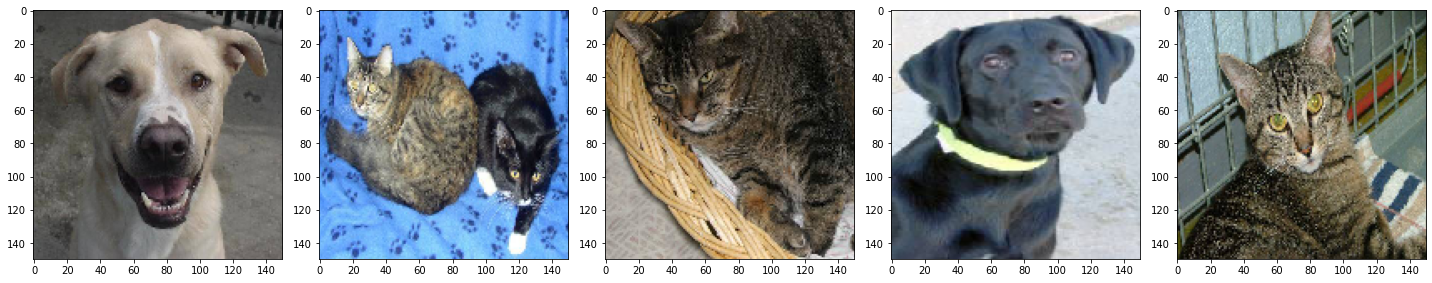

In [ ]:
plotimages(sample_training_images[:10])

### Flipping the image horizontally

In [ ]:
image_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_data_gen=image_gen.flow_from_directory(batch_size=batch_size, 
                                             directory=train_dir,
                                             shuffle=True,
                                             target_size=(img_shape,img_shape))

Found 2000 images belonging to 2 classes.


In [ ]:
augmented_images=[train_data_gen[5][0][0] for i in range(5)]

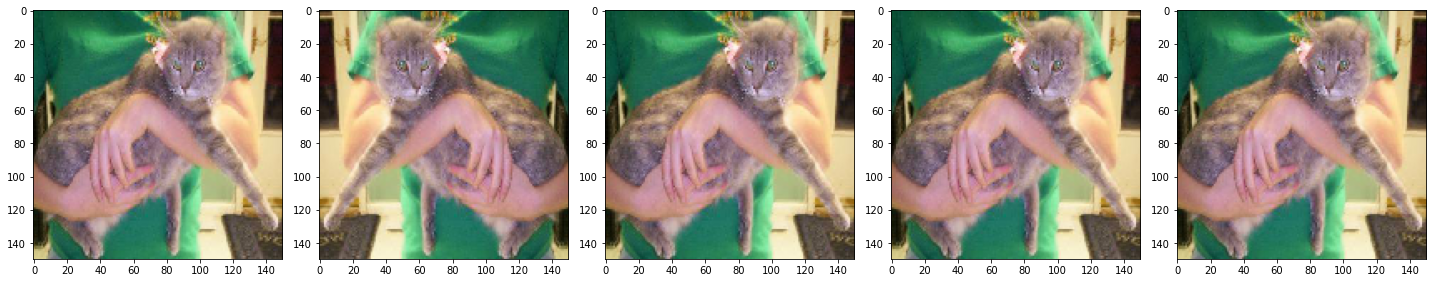

In [ ]:
plotimages(augmented_images)

### Rotating the image

In [ ]:
image_gen=ImageDataGenerator(rescale=1./255, rotation_range=60)
train_data_gen=image_gen.flow_from_directory(batch_size=batch_size,
                                             directory=train_dir,
                                             shuffle=True,
                                             target_size=(img_shape,img_shape))

Found 2000 images belonging to 2 classes.


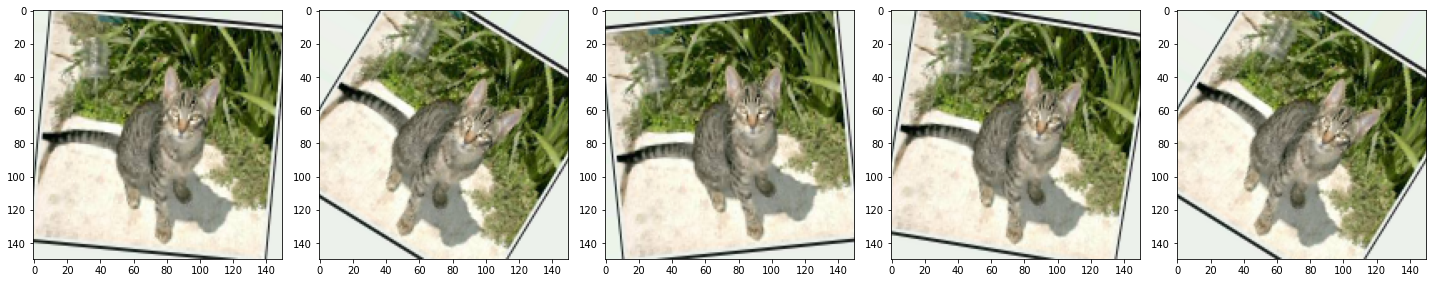

In [ ]:
augmented_images=[train_data_gen[5][0][0] for i in range(5)]
plotimages(augmented_images)

### Zoom the images

In [ ]:
image_gen=ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_dir_gen=image_gen.flow_from_directory(batch_size=batch_size,
                                            directory=train_dir,
                                            shuffle=True,
                                            target_size=(img_shape,img_shape))

Found 2000 images belonging to 2 classes.


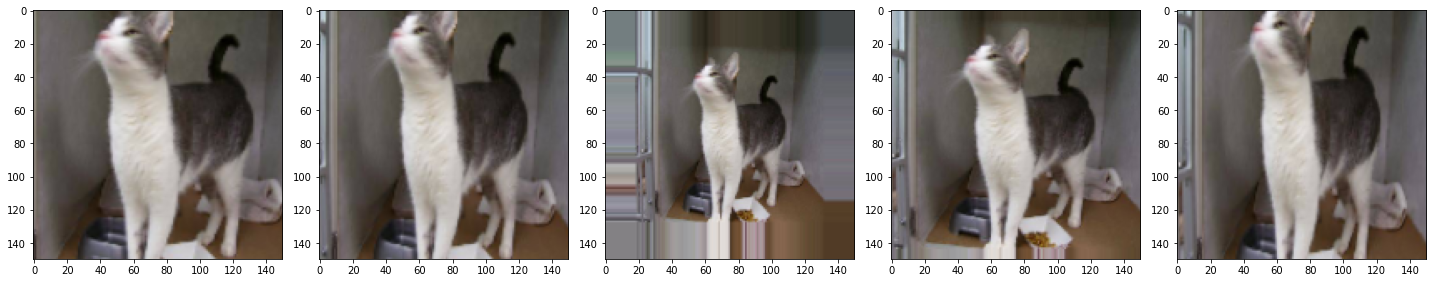

In [ ]:
augmented_image=[train_dir_gen[3][0][0] for i in range(5)]
plotimages(augmented_image)

### Combining all

In [ ]:
image_gen_train=ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   zoom_range=0.5,
                                   horizontal_flip=True,fill_mode='nearest')
train_data_gen=image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(img_shape,img_shape),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


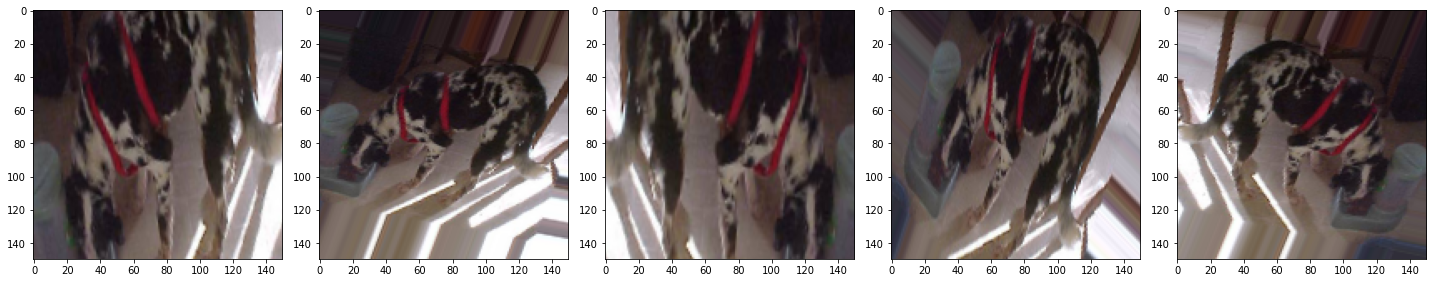

In [ ]:
augmented_image=[train_data_gen[1][0][0] for i in range(5)]
plotimages(augmented_image)

In [ ]:
image_gen_val=ImageDataGenerator(rescale=1./255)
val_data_gen=image_gen_val.flow_from_directory(batch_size=batch_size,
                                               directory=validation_dir,
                                               target_size=(img_shape,img_shape),
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(train_data_gen,epochs=100,validation_data=val_data_gen,steps_per_epoch=int(np.ceil(total_train / float(batch_size))),    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/100
20/20 [==============================] - 21s 911ms/step - loss: 0.7252 - accuracy: 0.5120 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 19s 959ms/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 18s 924ms/step - loss: 0.6902 - accuracy: 0.5395 - val_loss: 0.6768 - val_accuracy: 0.6170
Epoch 4/100
20/20 [==============================] - 19s 947ms/step - loss: 0.6822 - accuracy: 0.5625 - val_loss: 0.6806 - val_accuracy: 0.5520
Epoch 5/100
20/20 [==============================] - 22s 1s/step - loss: 0.6737 - accuracy: 0.5760 - val_loss: 0.6386 - val_accuracy: 0.6480
Epoch 6/100
20/20 [==============================] - 18s 910ms/step - loss: 0.6576 - accuracy: 0.6080 - val_loss: 0.6739 - val_accuracy: 0.5680
Epoch 7/100
20/20 [==============================] - 19s 950ms/step - loss: 0.6416 - accuracy: 0.6400 - val_loss: 0.6017 - val_accuracy: 0.

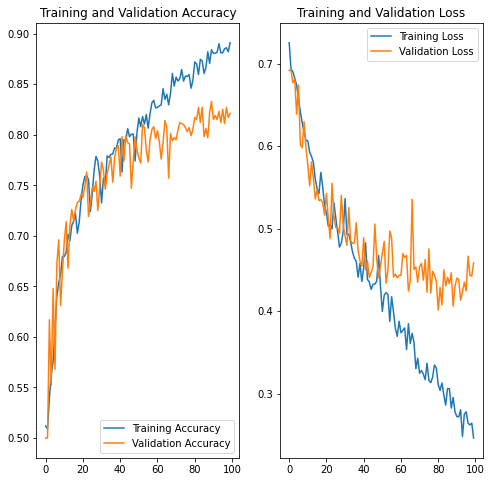

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=100
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
export_path_keras="dogs_cats_augmentation.h5"
model.save(export_path_keras)